In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
raw_data = pd.read_csv('../../dataset/Bank_Personal_Loan_Modelling.csv', header=0)

In [3]:
raw_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
raw_data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
raw_data.shape

(5000, 14)

In [7]:
raw_data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df = raw_data.copy()

In [9]:
df = df.drop('ID', axis=1)

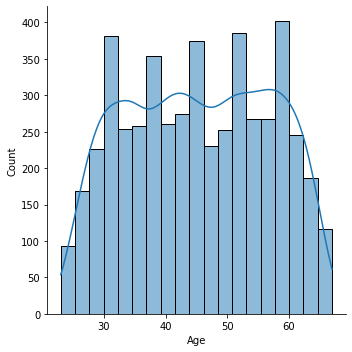

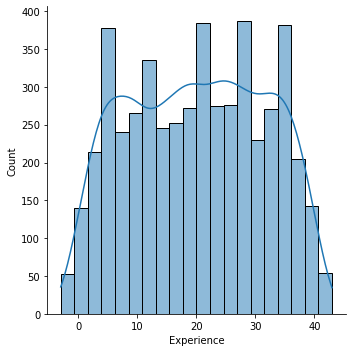

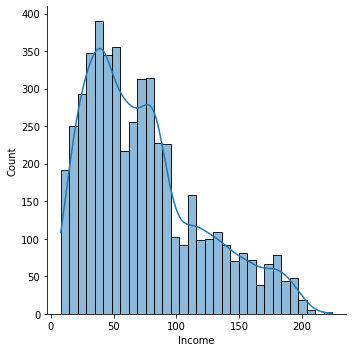

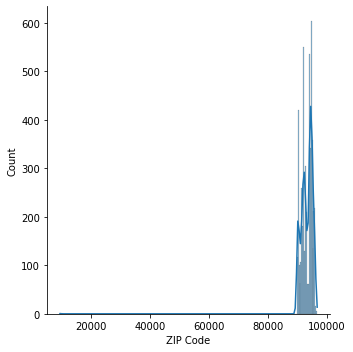

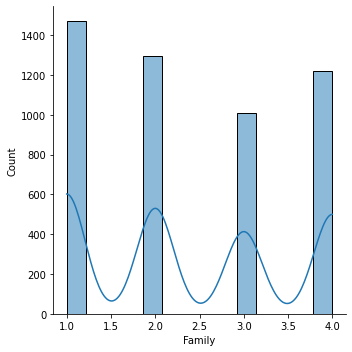

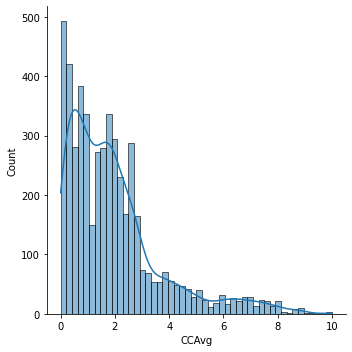

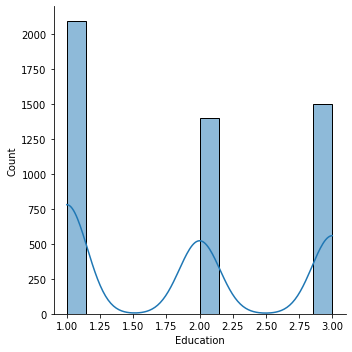

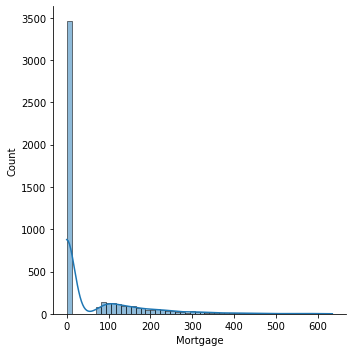

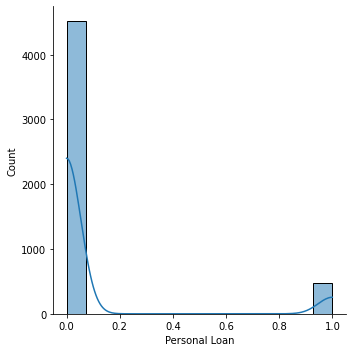

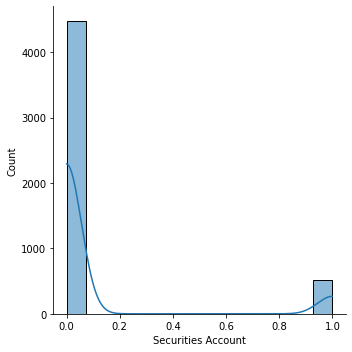

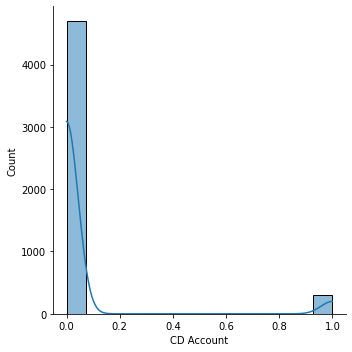

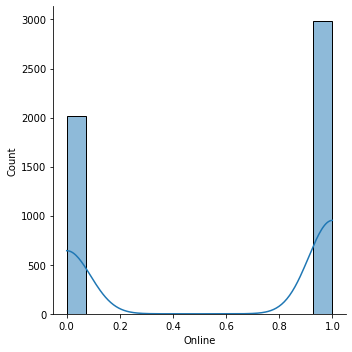

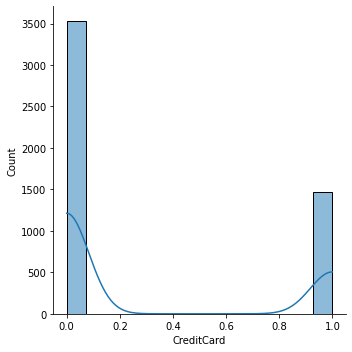

In [10]:
for i in df.describe().columns:
    sns.displot(df[i], kde=True)
    plt.show()

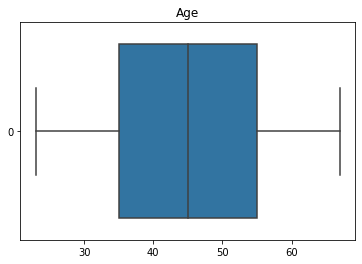

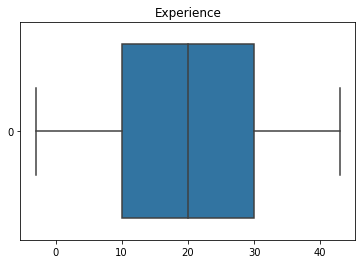

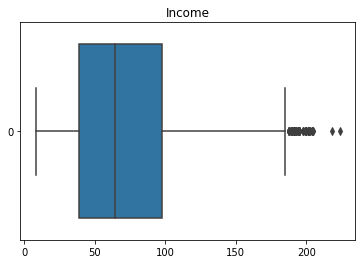

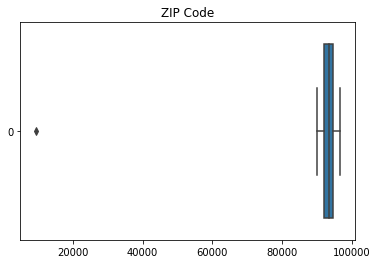

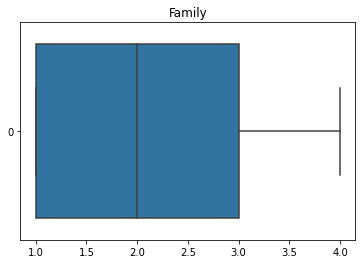

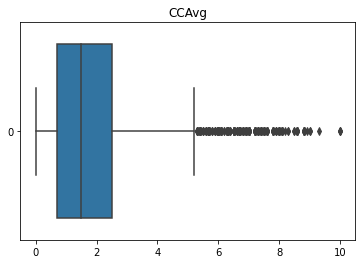

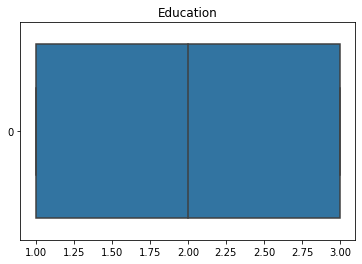

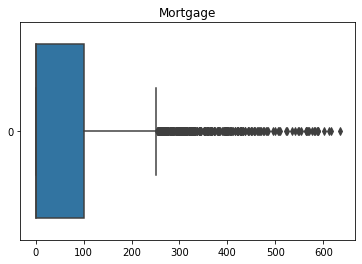

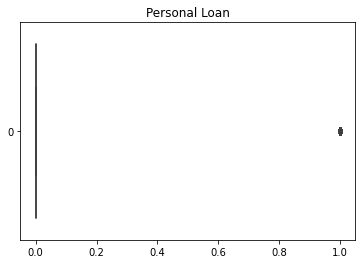

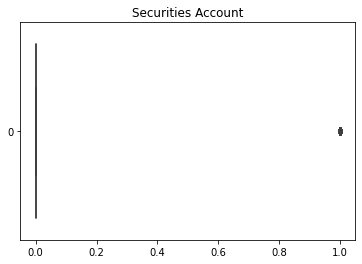

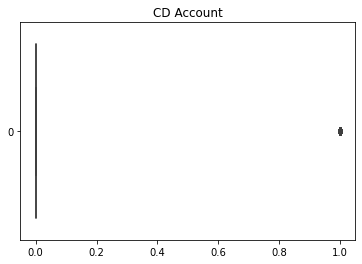

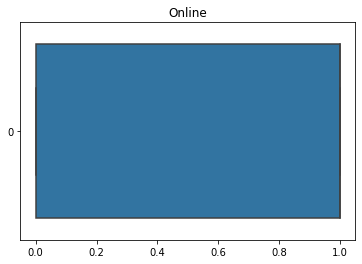

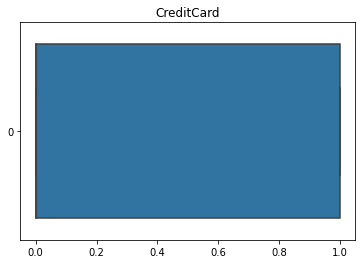

In [11]:
for i in df.describe().columns:
    sns.boxplot(df[i], orient='h')
    plt.title(df[i].name)
    plt.show()

In [12]:
np.unique(df[df['Experience'] < 0]['Experience'])

array([-3, -2, -1], dtype=int64)

In [13]:
df['Experience'] = df['Experience'].replace({-3: 0, -2: 0, -1: 0})

In [14]:
np.unique(df[df['Experience'] < 0]['Experience'])

array([], dtype=int64)

In [15]:
df['Experience'].value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
16    127
14    127
30    126
17    125
27    125
34    125
22    124
29    124
7     121
6     119
8     119
15    119
10    118
0     118
33    117
13    117
11    116
37    116
36    114
4     113
21    113
31    104
12    102
38     88
2      85
39     85
1      74
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

In [16]:
df['Securities Account'] = df['Securities Account'].replace({0: 'no', 1: 'yes'})
df['CD Account'] = df['CD Account'].replace({0: 'no', 1: 'yes'})
df['Online'] = df['Online'].replace({0: 'no', 1: 'yes'})
df['CreditCard'] = df['CreditCard'].replace({0: 'no', 1: 'yes'})

In [17]:
df = pd.get_dummies(df, ['Securities Account', 'CD Account', 'Online', 'CreditCard'])

In [18]:
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

y.value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

In [20]:
print(len(X_train), len(y_train))

3500 3500


In [21]:
from sklearn.ensemble import ExtraTreesClassifier

etmodel = ExtraTreesClassifier()
etmodel.fit(X_train, y_train)
etmodel.feature_importances_

array([0.03863452, 0.03876939, 0.31659474, 0.03726   , 0.0880776 ,
       0.13670667, 0.14123459, 0.03643405, 0.00794156, 0.00740711,
       0.05322696, 0.05164701, 0.00952879, 0.00990397, 0.01206363,
       0.01456942])

In [22]:
X_train.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account_no',
       'Securities Account_yes', 'CD Account_no', 'CD Account_yes',
       'Online_no', 'Online_yes', 'CreditCard_no', 'CreditCard_yes'],
      dtype='object')

In [23]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
dtmodel.feature_importances_

array([0.03216341, 0.01931397, 0.30866824, 0.02050764, 0.13941948,
       0.06221952, 0.38079693, 0.00796272, 0.00224961, 0.        ,
       0.        , 0.02403632, 0.        , 0.00266216, 0.        ,
       0.        ])

In [25]:
dtmodel.score(X_train, y_train)

1.0

In [26]:
dtmodel.score(X_test, y_test)

0.986

In [27]:
test_predict = dtmodel.predict(X_test)

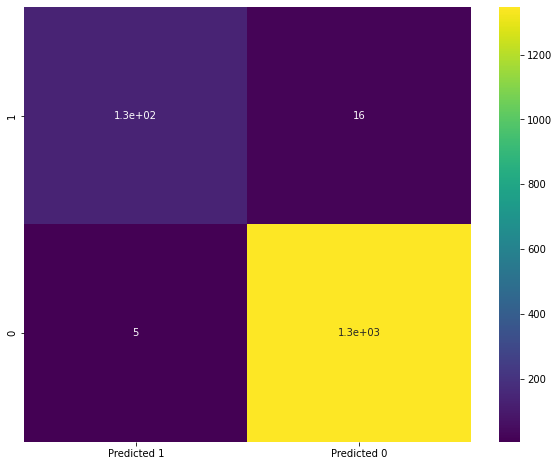

In [28]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index=[1,0], columns=['Predicted 1', 'Predicted 0'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, cmap='viridis')
plt.show()

In [29]:
print(metrics.classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1352
           1       0.96      0.89      0.93       148

    accuracy                           0.99      1500
   macro avg       0.98      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



## Data Imbalance

In [30]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in kfold.split(x, y):
    train_x, test_x = x.values[train_index], x.values[test_index]
    train_y, test_y = y[train_index], y[test_index]
print(len(train_y[train_y==0]), len(train_y[train_y==1]))
print(len(test_y[test_y==0]), len(test_y[test_y==1]))

4068 432
452 48


In [31]:
train_y.value_counts()

0    4068
1     432
Name: Personal Loan, dtype: int64

In [32]:
dtmodel = DecisionTreeClassifier()
dtmodel.fit(train_x, train_y)

DecisionTreeClassifier()

In [33]:
dtmodel.score(train_x, train_y)

1.0

In [34]:
dtmodel.score(test_x, test_y)

0.98

In [35]:
test_predict = dtmodel.predict(test_x)

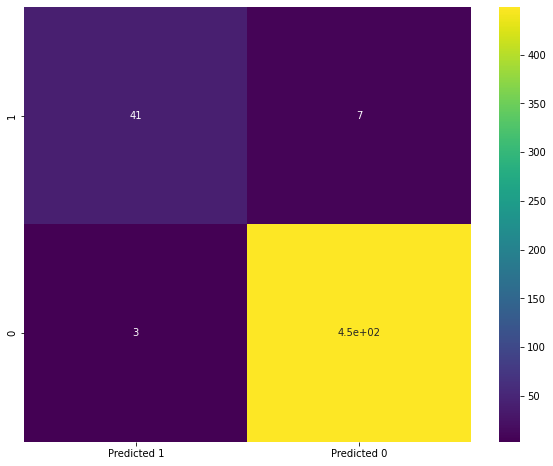

In [36]:
cm = metrics.confusion_matrix(test_y, test_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index=[1,0], columns=['Predicted 1', 'Predicted 0'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, cmap='viridis')
plt.show()

In [37]:
print(metrics.classification_report(test_y, test_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       452
           1       0.93      0.85      0.89        48

    accuracy                           0.98       500
   macro avg       0.96      0.92      0.94       500
weighted avg       0.98      0.98      0.98       500



In [38]:
from sklearn.utils import resample

class_1 = df[df['Personal Loan']==1]
class_0 = df[df['Personal Loan']==0]
print(len(class_1), len(class_0))

480 4520


In [39]:
upsample_class_1 = resample(class_1,
        replace=True,
        n_samples=len(class_0) - 480,
        random_state=2)

In [40]:
upsample_class_1 = upsample_class_1.reset_index(drop=True)

In [41]:
df = pd.concat([df, upsample_class_1], axis=0)

In [42]:
df['Personal Loan'].value_counts()

0    4520
1    4520
Name: Personal Loan, dtype: int64

In [43]:
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in kfold.split(x, y):
    train_x, test_x = x.values[train_index], x.values[test_index]
    train_y, test_y = y.values[train_index], y.values[test_index]

In [44]:
dtmodel = DecisionTreeClassifier()
dtmodel.fit(train_x, train_y)

DecisionTreeClassifier()

In [45]:
dtmodel.score(train_x, train_y)

1.0

In [46]:
dtmodel.score(test_x, test_y)

0.9988938053097345

In [47]:
test_predict = dtmodel.predict(test_x)

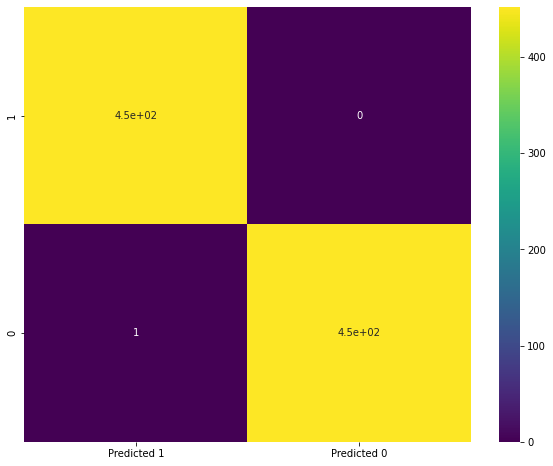

In [48]:
cm = metrics.confusion_matrix(test_y, test_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index=[1,0], columns=['Predicted 1', 'Predicted 0'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, cmap='viridis')
plt.show()

In [49]:
print(metrics.classification_report(test_y, test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       452
           1       1.00      1.00      1.00       452

    accuracy                           1.00       904
   macro avg       1.00      1.00      1.00       904
weighted avg       1.00      1.00      1.00       904



In [50]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

adamodel = AdaBoostClassifier(n_estimators=70, random_state=3)
adamodel.fit(train_x, train_y)

AdaBoostClassifier(n_estimators=70, random_state=3)

In [51]:
adamodel.score(train_x, train_y)

0.9519419862340216

In [52]:
adamodel.score(test_x, test_y)

0.963495575221239

In [53]:
gdmodel = GradientBoostingClassifier(n_estimators=70, random_state=3)
gdmodel.fit(train_x, train_y)

GradientBoostingClassifier(n_estimators=70, random_state=3)

In [54]:
gdmodel.score(train_x, train_y)

0.9867256637168141

In [55]:
gdmodel.score(test_x, test_y)

0.9867256637168141

In [56]:
from xgboost import XGBClassifier

xgmodel = XGBClassifier()
xgmodel.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [57]:
xgmodel.score(train_x, train_y)

1.0

In [58]:
xgmodel.score(test_x, test_y)

0.9977876106194691

In [59]:
test_predict = dtmodel.predict(test_x)

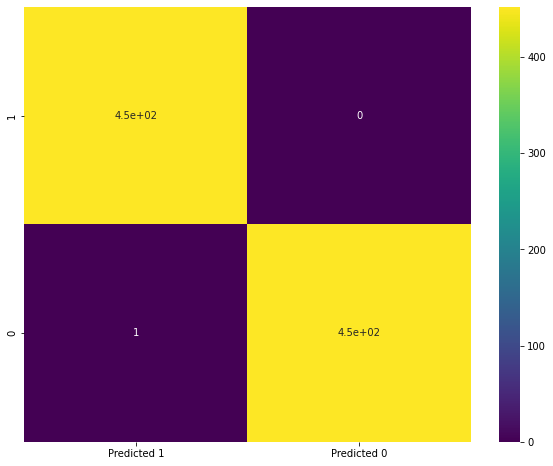

In [60]:
cm = metrics.confusion_matrix(test_y, test_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index=[1,0], columns=['Predicted 1', 'Predicted 0'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, cmap='viridis')
plt.show()

In [61]:
print(metrics.classification_report(test_y, test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       452
           1       1.00      1.00      1.00       452

    accuracy                           1.00       904
   macro avg       1.00      1.00      1.00       904
weighted avg       1.00      1.00      1.00       904

